<a href="https://colab.research.google.com/github/Guneeth-Kakani/FMML_Project_and_Labs/blob/main/AIML_Module_5project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module Project: Regression analysis on a COVID-dataset


In this project, we will use the concepts of regression and regularization we have learnt to predict early Covid-19 cases. We shall use linear regression, polynomial regression and ridge regression to obtain a reasonably good estimate of the future cases. Try experimenting with hyperparameters to obtain better results.

## Data Analysis

### 1. **Load the data** into a pandas dataframe.

In [33]:
# Imports
import pandas as pd
import numpy  as np
import scipy.integrate

from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

import copy
from   sklearn.metrics       import mean_squared_error, mean_absolute_error
from   sklearn.linear_model  import LinearRegression, BayesianRidge
from   sklearn.tree          import DecisionTreeRegressor
from   sklearn.preprocessing import PolynomialFeatures

In [34]:
path = "https://raw.githubusercontent.com/PranavTadimeti/Regression_Project/main/covid_19_data.csv"
df_orig = pd.read_csv(path)
print(df_orig)

         SNo ObservationDate Province/State  Country/Region  \
0          1      01/22/2020          Anhui  Mainland China   
1          2      01/22/2020        Beijing  Mainland China   
2          3      01/22/2020      Chongqing  Mainland China   
3          4      01/22/2020         Fujian  Mainland China   
4          5      01/22/2020          Gansu  Mainland China   
...      ...             ...            ...             ...   
10666  10667      03/31/2020        Wyoming              US   
10667  10668      03/31/2020       Xinjiang  Mainland China   
10668  10669      03/31/2020          Yukon          Canada   
10669  10670      03/31/2020         Yunnan  Mainland China   
10670  10671      03/31/2020       Zhejiang  Mainland China   

               Last Update  Confirmed  Deaths  Recovered  
0          1/22/2020 17:00        1.0     0.0        0.0  
1          1/22/2020 17:00       14.0     0.0        0.0  
2          1/22/2020 17:00        6.0     0.0        0.0  
3      

### 2. Create a new dataframe which counts the cumulative total number of cases, the cumulative total number of deaths, and also  cumulative total number of recoveries for each date.

In [35]:
df = copy.deepcopy(df_orig)
df.drop('Last Update',inplace=True,axis=1)
date_lst  = df.ObservationDate.unique()
date_dict = {}

for i in range(len(date_lst)):
    df_temp = df.loc[df['ObservationDate'] == date_lst[i]]
    date_dict[date_lst[i]] = df_temp


In [36]:
date_tot_tup_dict = {};
for date, df in date_dict.items():
    tup_temp = (df['Confirmed'].sum(), df['Deaths'].sum(), df['Recovered'].sum())
    date_tot_tup_dict[date] = tup_temp


In [37]:
print(date_tot_tup_dict)

{'01/22/2020': (np.float64(555.0), np.float64(17.0), np.float64(28.0)), '01/23/2020': (np.float64(653.0), np.float64(18.0), np.float64(30.0)), '01/24/2020': (np.float64(941.0), np.float64(26.0), np.float64(36.0)), '01/25/2020': (np.float64(1438.0), np.float64(42.0), np.float64(39.0)), '01/26/2020': (np.float64(2118.0), np.float64(56.0), np.float64(52.0)), '01/27/2020': (np.float64(2927.0), np.float64(82.0), np.float64(61.0)), '01/28/2020': (np.float64(5578.0), np.float64(131.0), np.float64(107.0)), '01/29/2020': (np.float64(6165.0), np.float64(133.0), np.float64(126.0)), '01/30/2020': (np.float64(8235.0), np.float64(171.0), np.float64(143.0)), '01/31/2020': (np.float64(9925.0), np.float64(213.0), np.float64(222.0)), '02/01/2020': (np.float64(12038.0), np.float64(259.0), np.float64(284.0)), '02/02/2020': (np.float64(16787.0), np.float64(362.0), np.float64(472.0)), '02/03/2020': (np.float64(19881.0), np.float64(426.0), np.float64(623.0)), '02/04/2020': (np.float64(23892.0), np.float64(49

In [38]:
df_date_tots = pd.DataFrame(date_tot_tup_dict)
df_date_tots = df_date_tots.transpose()
df_date_tots.columns = ['Confirmed', 'Deaths', 'Recovered']
print(df_date_tots.head())

            Confirmed  Deaths  Recovered
01/22/2020      555.0    17.0       28.0
01/23/2020      653.0    18.0       30.0
01/24/2020      941.0    26.0       36.0
01/25/2020     1438.0    42.0       39.0
01/26/2020     2118.0    56.0       52.0


### 3. Create a new column in the dataframe called **“closed cases”**

In [39]:
df_date_tots['Closed Cases'] = df_date_tots['Deaths'] + df_date_tots['Recovered']

### 4. Create a new column in the dataframe called “active cases”

In [40]:
df_date_tots['Active Cases'] = df_date_tots['Confirmed'] - df_date_tots['Closed Cases']

### 5. **Plot** the total number of cases per day over time and summarize findings

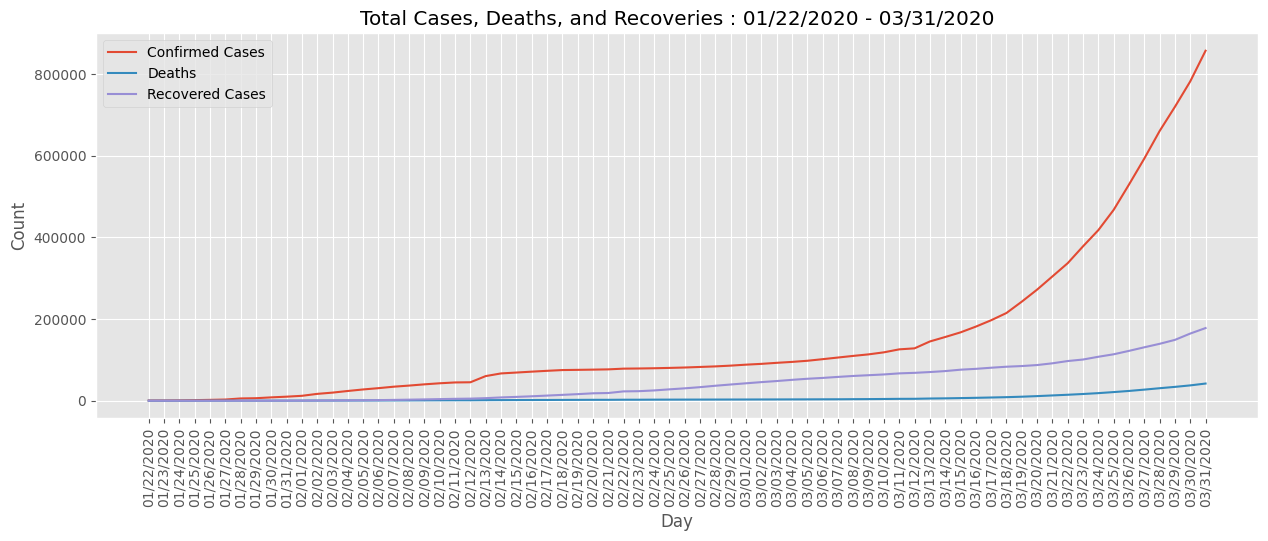

In [41]:
plt.figure(figsize = [15,5])
plt.plot(df_date_tots['Confirmed'], label = "Confirmed Cases")
plt.plot(df_date_tots['Deaths'], label    = "Deaths")
plt.plot(df_date_tots['Recovered'], label = "Recovered Cases")

plt.legend()
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation = 90);
start_date = str(date_lst[0]);
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Total Cases, Deaths, and Recoveries : " + start_date + " - " + fin_date);


All of the three curves seem to be exponential (start of logistic curve). The confirmed cases was obviously higher than the deaths and recovered cases. The rate of the the recovered cases seems to be higher than that of the death curve.

### 6. Create one **plot** showing the trend of number of active cases and closed cases

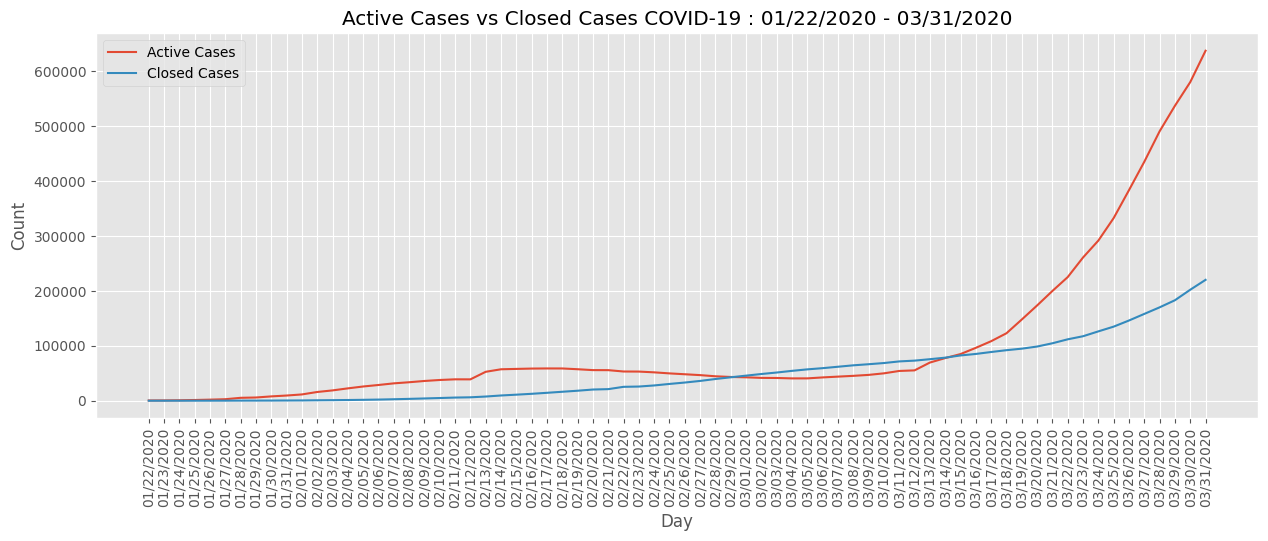

In [42]:
plt.figure(figsize = [15,5])
plt.plot(df_date_tots['Active Cases'], label = "Active Cases")
plt.plot(df_date_tots['Closed Cases'], label = "Closed Cases")

plt.legend();
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation = 90)
start_date = str(date_lst[0])
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Active Cases vs Closed Cases COVID-19 : " + start_date + " - " + fin_date);

The number of active cases is higher than the number of closed cases as of yet.

### 7. Growth Factor

**Growth factor** is the factor by which a quantity multiplies itself over time. In the below cell, we calculate the GF of the confirmed, recovered and death cases.


In [46]:
import pandas as pd
import numpy as np

def calculate_growth_factor(series):
    growth_factors = []
    for i in range(1, len(series)):
        prev = series.iat[i - 1]
        curr = series.iat[i]
        if prev == 0:  # or use np.inf, or customize as needed
            gf = np.nan
        else:
            gf = curr / prev
        growth_factors.append(gf)
    # Pad with NaN to match original series length
    return [np.nan] + growth_factors




### 8. Create one plot showing the Growth factor of confirmed, recovered and death cases wrt days

Text(0.5, 1.0, 'Growth Factors of Confirmed, Death, and Recovered Cases COVID-19 : 01/22/2020 - 03/31/2020')

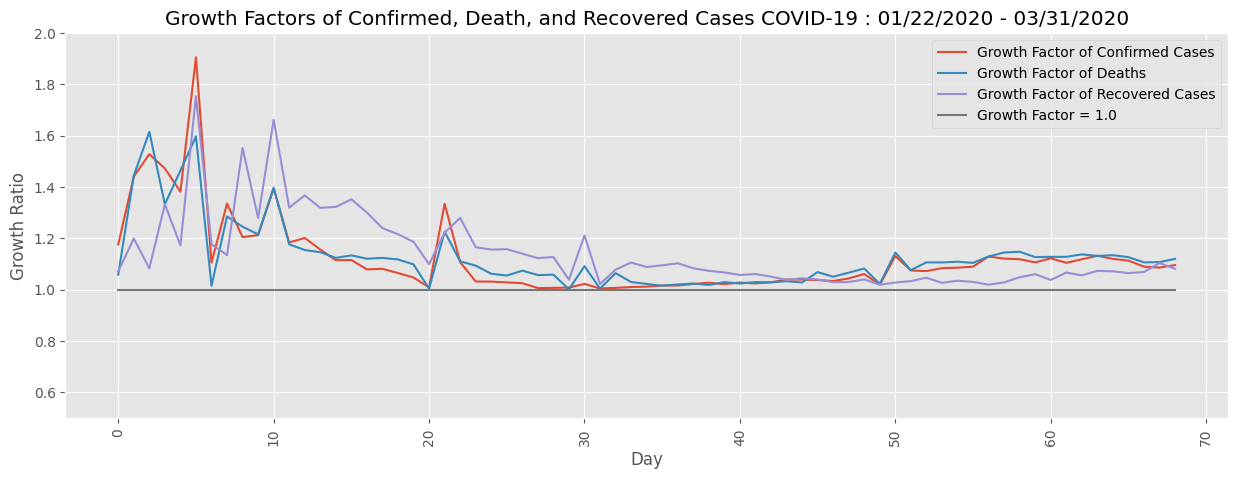

In [47]:
plt.figure(figsize = [15,5])
plt.plot(confGF_lst, label = "Growth Factor of Confirmed Cases")
plt.plot(deathsGF_lst, label = "Growth Factor of Deaths")
plt.plot(recovGF_lst, label = "Growth Factor of Recovered Cases")
x = []
for i in range((growth_len_lst)):
    x.append(1)
plt.plot(x, label = "Growth Factor = 1.0")

#plt.grid()
plt.legend()
plt.xlabel("Day")
plt.ylabel("Growth Ratio")
plt.ylim(.5,2)
plt.xticks(rotation = 90)
start_date = str(date_lst[0])
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Growth Factors of Confirmed, Death, and Recovered Cases COVID-19 : " +start_date +" - " +fin_date)

# **Part 2 - Prediction Using Linear Regression**

#### To make our data to be compatible with *sklearn* format, create a new column called “Days since” which tracks the number of days since the initial date.

In [48]:
days_since_lst = []
for i in range(len(date_lst)):
    days_since_lst.append(i)
df_date_tots["Days Since:"] = days_since_lst
df_date_tots = df_date_tots[["Days Since:", "Confirmed", "Deaths", "Recovered", "Active Cases", "Closed Cases"]]


### 8. Take the earliest 85% of the dates as **train** and the rest as **test**

In [49]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

X = np.array(df_date_tots["Days Since:"]).reshape(-1,1)
y = np.array(df_date_tots["Confirmed"])


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.15,
                                                    shuffle = False)

### 9. We can try different regression and regularizations we have seen before

#### 9.1 Linear Regression

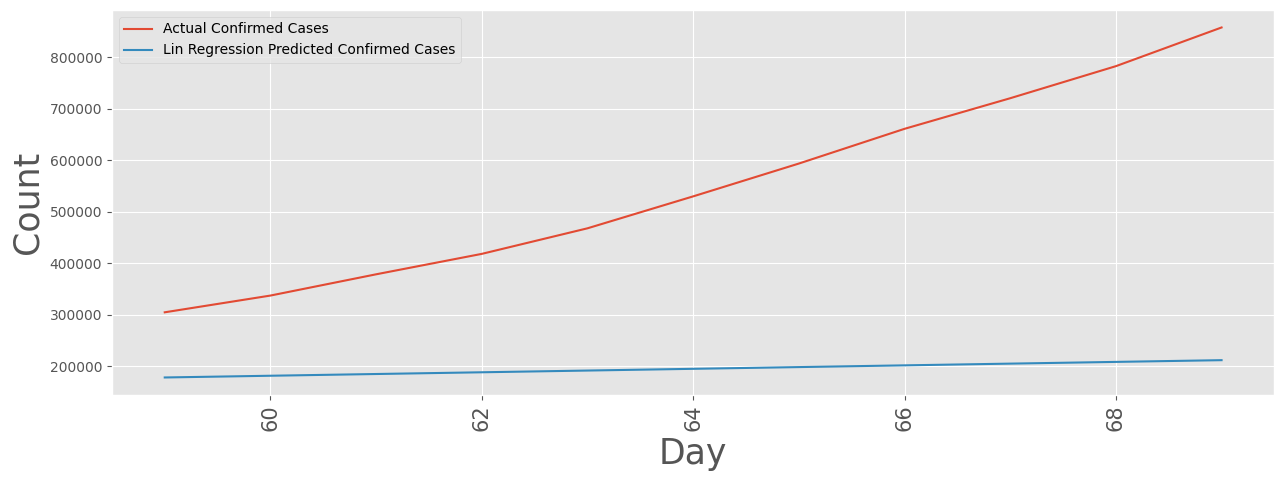

MAE: 355097.09752404224
MSE: 154371404286.4277


In [51]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)  # Assumes X_train, y_train are defined

# Predict test/whole dataset
test_lin_pred = lin_model.predict(X_test)
lin_pred = lin_model.predict(X)

# Plotting
plt.figure(figsize=[15, 5])
plt.plot(X_test, y_test, label="Actual Confirmed Cases")
plt.plot(X_test, test_lin_pred, label="Lin Regression Predicted Confirmed Cases")
plt.grid(True)
plt.legend()
plt.xlabel("Day", size=25)
plt.ylabel("Count", size=25)
plt.xticks(rotation=90, size=15)
plt.show()

# Evaluate
mae = mean_absolute_error(y_test, test_lin_pred)
mse = mean_squared_error(y_test, test_lin_pred)
print('MAE:', mae)
print('MSE:', mse)


#### Polynomial Regression

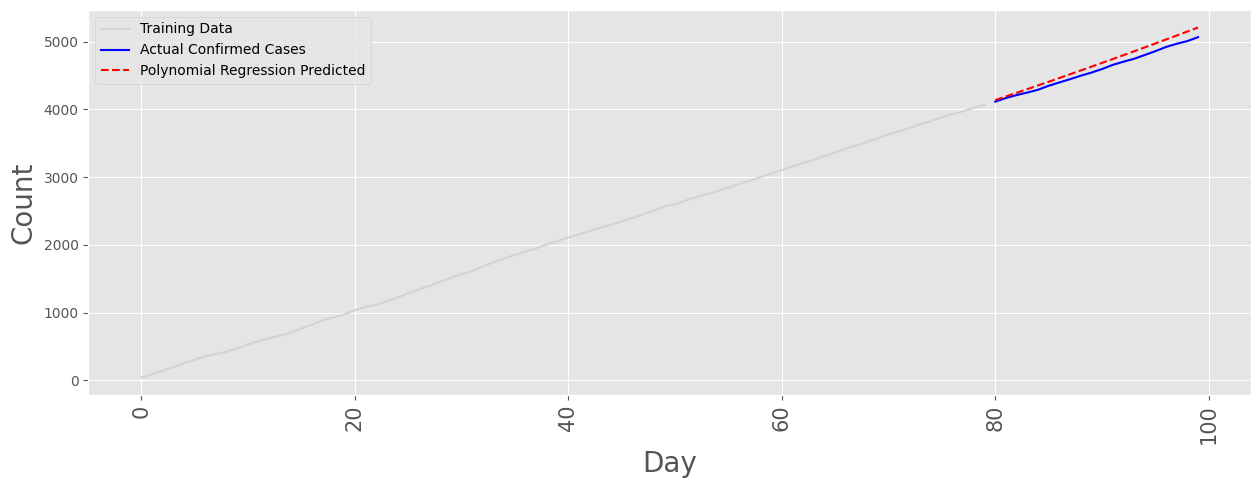

MAE: 84.1271358023212
MSE: 8277.13291085597


In [57]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# -------------------------------------------------------
# Load your actual DataFrame here, so replace this block!
# -------------------------------------------------------
data = {
    'Days Since': np.arange(100),
    'Confirmed': np.cumsum(np.random.poisson(50, 100))  # Example cumulative cases
}
df = pd.DataFrame(data)
# -------------------------------------------------------

# **This section is universal for your notebook**
X = df['Days Since'].values.reshape(-1, 1)  # Your feature column, reshape for sklearn
y = df['Confirmed'].values                  # Your target column

# **Train-test split (time-based, no shuffle)**
split_idx = int(0.8 * len(X))
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

# **Polynomial feature creation (fit on train, transform everywhere)**
poly = PolynomialFeatures(degree=5)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.transform(X_test)
poly_X = poly.transform(X)

# **Model training**
model = LinearRegression(fit_intercept=False)
model.fit(poly_X_train, y_train)

# **Predictions**
test_pred = model.predict(poly_X_test)
train_pred = model.predict(poly_X_train)     # For optional plot
all_pred = model.predict(poly_X)             # For optional plot

# **Plotting**
plt.figure(figsize=[15, 5])
plt.plot(X_train, y_train, label='Training Data', color='lightgray')
plt.plot(X_test, y_test, label='Actual Confirmed Cases', color='blue')
plt.plot(X_test, test_pred, label='Polynomial Regression Predicted', linestyle='--', color='red')
plt.xlabel('Day', size=20)
plt.ylabel('Count', size=20)
plt.xticks(rotation=90, size=15)
plt.legend()
plt.grid(True)
plt.show()

# **Metrics**
print('MAE:', mean_absolute_error(y_test, test_pred))
print('MSE:', mean_squared_error(y_test, test_pred))


### 9.2 Ridge Regression

In [59]:
tol      = [1e-4, 1e-3, 1e-2]
alpha_1  = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2  = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol,
                 'alpha_1': alpha_1,
                 'alpha_2' : alpha_2,
                 'lambda_1': lambda_1,
                 'lambda_2' : lambda_2 }

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian,
                                     bayesian_grid,
                                     scoring='neg_mean_squared_error',
                                     cv=3,
                                     return_train_score=True,
                                     n_jobs=-1,
                                     n_iter=40,
                                     verbose=1)

bayesian_search.fit(X_train, y_train)

print(bayesian_search.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'tol': 0.01, 'lambda_2': 1e-06, 'lambda_1': 0.0001, 'alpha_2': 0.0001, 'alpha_1': 1e-07}


In [60]:
y_test_ridge_pred = bayesian_search.predict(X_test);
y_ridge_pred = bayesian_search.predict(X);

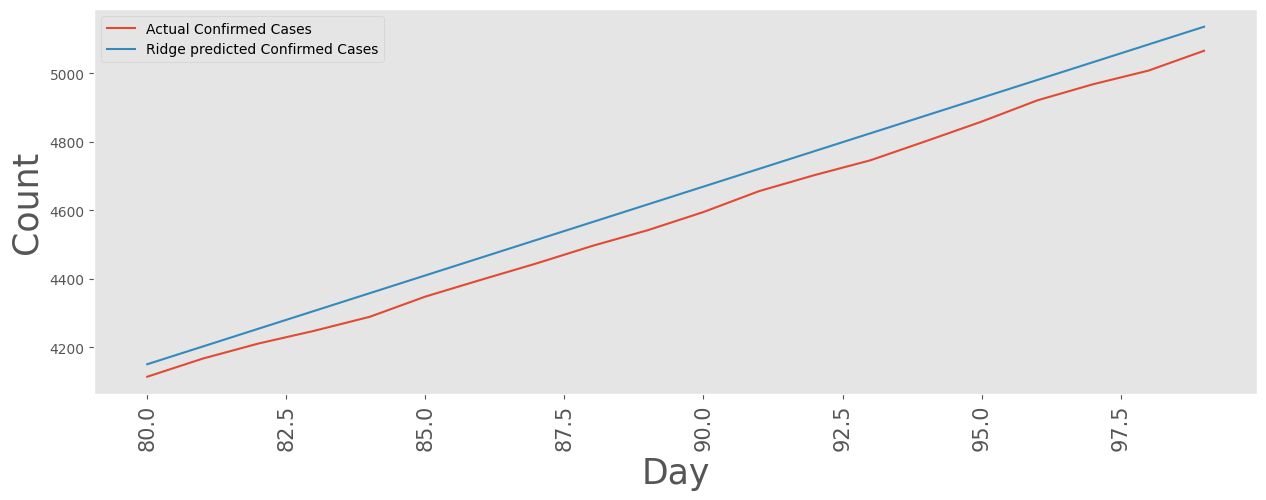

MAE: 4553.818941201123
MSE: 20823345.92631054


In [61]:
plt.figure(figsize = [15,5])

# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")

# plotting the predicited values for the future days
plt.plot(X_test,
         y_test_ridge_pred,
         label = "Ridge predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error (y_test_ridge_pred, X_test))
print('MSE:', mean_squared_error  (y_test_ridge_pred, X_test))

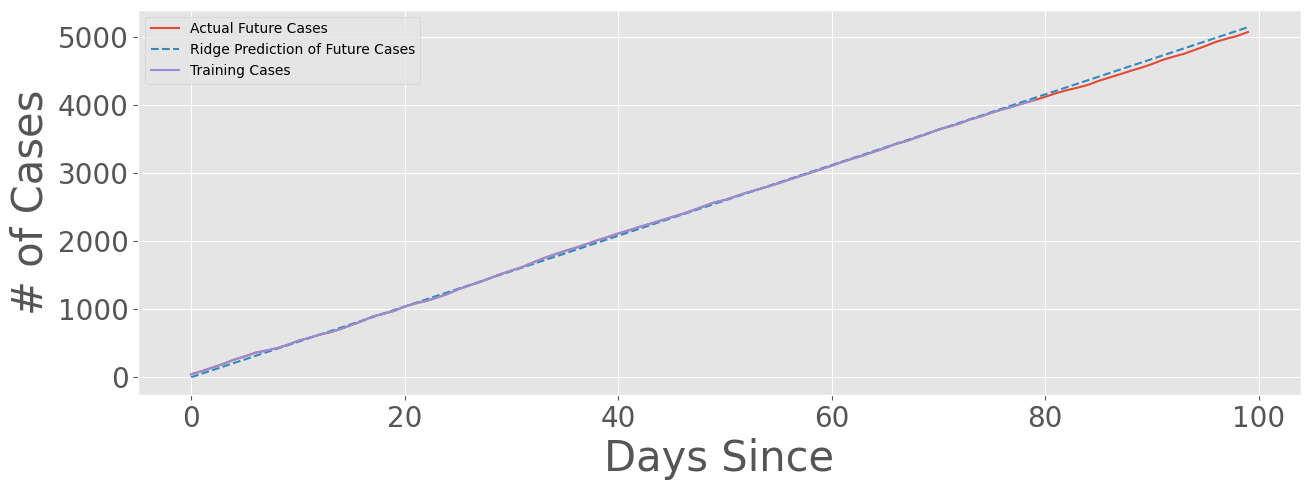

In [62]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')
plt.plot(X,
         y_ridge_pred,
         label = 'Ridge Prediction of Future Cases',
         linestyle = "dashed")
plt.plot(X_train,
         y_train,
         label = 'Training Cases')

#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

#### Polynomial Ridge Regression

In [63]:
bayesian_search_poly = RandomizedSearchCV(bayesian,
                                     bayesian_grid,
                                     scoring='neg_mean_squared_error',
                                     cv=3,
                                     return_train_score=True,
                                     n_jobs=-1,
                                     n_iter=40,
                                     verbose=1)


In [64]:
bayesian_search_poly.fit(poly_X_train, y_train);
print(bayesian_search_poly.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'tol': 0.0001, 'lambda_2': 1e-07, 'lambda_1': 0.0001, 'alpha_2': 1e-07, 'alpha_1': 1e-06}


In [65]:
bayesian_poly_confirmed = bayesian_search_poly.best_estimator_
test_poly_bayesian_pred = bayesian_poly_confirmed.predict(poly_X_test)
bayesian_poly_pred = bayesian_poly_confirmed.predict(poly_X)

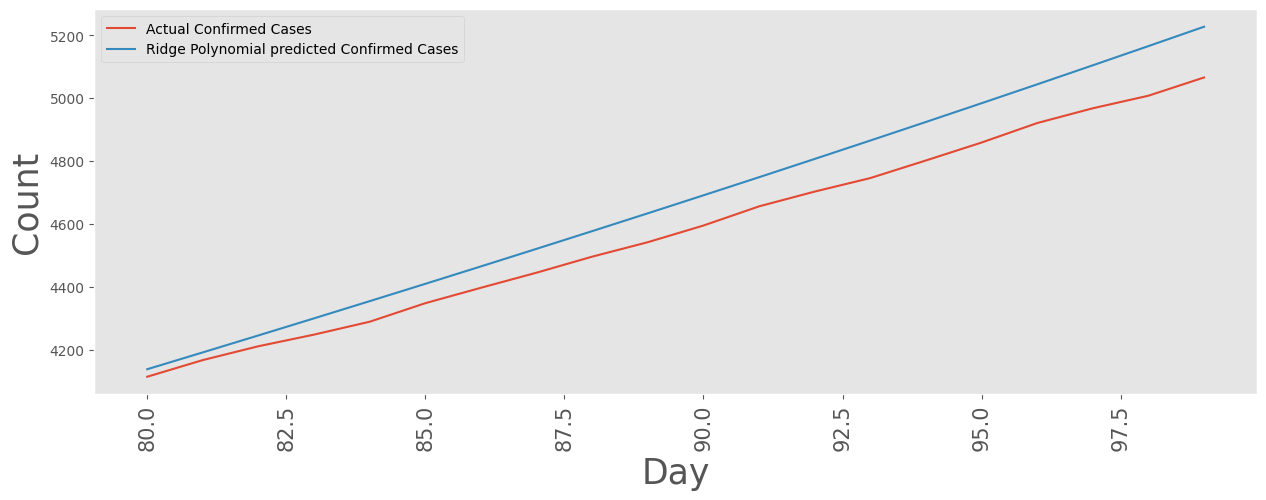

MAE: 90.87654546087056
MSE: 9846.222115147626


In [66]:
plt.figure(figsize = [15,5])

# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")

# plotting the predicited values for the future days
plt.plot(X_test,
         test_poly_bayesian_pred,
         label = "Ridge Polynomial predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15)
plt.show()

print ('MAE:', mean_absolute_error(test_poly_bayesian_pred, y_test))
print ('MSE:', mean_squared_error (test_poly_bayesian_pred, y_test))

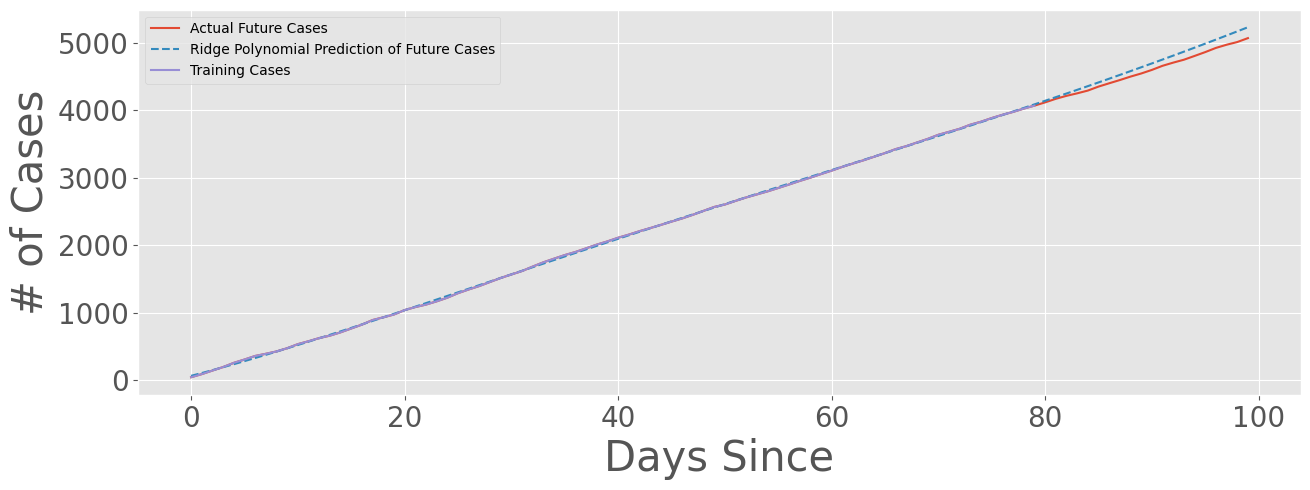

In [67]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')
plt.plot(X,
         bayesian_poly_pred,
         label = 'Ridge Polynomial Prediction of Future Cases',
         linestyle = "dashed")
plt.plot(X_train,
         y_train,
         label = 'Training Cases')

#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
#plt.grid()
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

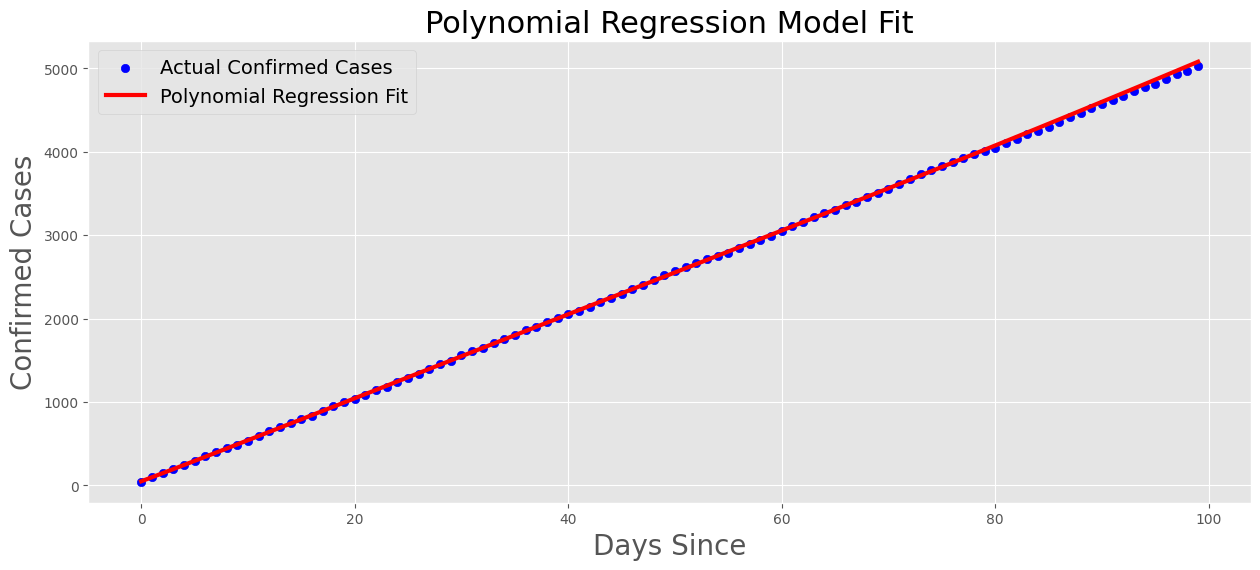

In [70]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Example data (replace with your CSV/file loading code if you have real data)
data = {
    'Days Since': np.arange(100),
    'Confirmed': np.cumsum(np.random.poisson(50, 100))
}
df = pd.DataFrame(data)

# Features and target
X = df['Days Since'].values.reshape(-1, 1)
y = df['Confirmed'].values

# Train-test split (time-based, no shuffle)
splitidx = int(0.8 * len(X))
Xtrain, ytrain = X[:splitidx], y[:splitidx]
Xtest, ytest = X[splitidx:], y[splitidx:]

# Polynomial feature engineering
poly = PolynomialFeatures(degree=5)
polyXtrain = poly.fit_transform(Xtrain)
polyXtest = poly.transform(Xtest)
polyX = poly.transform(X)

# Model training
model = LinearRegression(fit_intercept=False)
model.fit(polyXtrain, ytrain)

# Predictions
testpred = model.predict(polyXtest)
pred = model.predict(polyX)  # For plotting full curve

# Plotting
plt.figure(figsize=(15, 6))
plt.scatter(X, y, color='blue', label='Actual Confirmed Cases')  # Actual cumulative cases
plt.plot(X, pred, color='red', linewidth=3, label='Polynomial Regression Fit')  # Model fit line
plt.xlabel('Days Since', size=20)
plt.ylabel('Confirmed Cases', size=20)
plt.title('Polynomial Regression Model Fit', size=22)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()


From Mean Absolute Error and Mean Squared Error values, Ridge Polynomial Regression Model seems to be the best model.